In [1]:
from torch_geometric.datasets import Planetoid

# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

In [10]:
import torch
torch.manual_seed(1)
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GCNConv
from torch.nn import Linear, Dropout
import numpy as np


def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)


class GAT(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=0.01)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            print(data.x.shape)
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

# Create the Vanilla GNN model
gat = GAT(dataset.num_features, 32, dataset.num_classes)
print(gat)

# Train
gat.fit(data, epochs=100)

# Test
acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

GAT(
  (gat1): GATv2Conv(3703, 32, heads=8)
  (gat2): GATv2Conv(256, 6, heads=1)
)
torch.Size([3327, 3703])
Epoch   0 | Train Loss: 1.823 | Train Acc: 10.83% | Val Loss: 1.81 | Val Acc: 18.20%
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
Epoch  20 | Train Loss: 0.138 | Train Acc: 98.33% | Val Loss: 1.25 | Val Acc: 61.40%
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703])
torch.Size([3327, 3703

In [11]:
data

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

In [3]:
dataset = Planetoid(root=".", name="CiteSeer")
data = dataset[0]
data

Processing...
Done!


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

<BarContainer object of 32 artists>

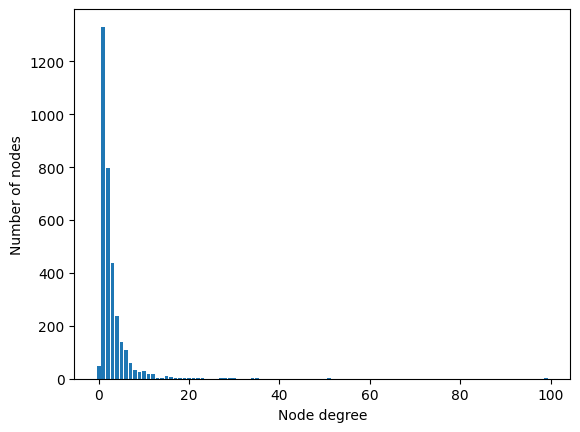

In [4]:
import matplotlib.pyplot as plt
from torch_geometric.utils import degree
from collections import Counter

# Get list of degrees for each node
degrees = degree(dataset[0].edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [5]:
# Create the Vanilla GNN model
gat = GAT(dataset.num_features, 16, dataset.num_classes)
print(gat)

# Train
gat.fit(data, epochs=100)

# Test
acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

GAT(
  (gat1): GATv2Conv(3703, 16, heads=8)
  (gat2): GATv2Conv(128, 6, heads=1)
)
Epoch   0 | Train Loss: 1.803 | Train Acc: 15.83% | Val Loss: 1.81 | Val Acc: 16.60%
Epoch  20 | Train Loss: 0.175 | Train Acc: 96.67% | Val Loss: 1.15 | Val Acc: 60.40%
Epoch  40 | Train Loss: 0.134 | Train Acc: 97.50% | Val Loss: 1.22 | Val Acc: 62.00%
Epoch  60 | Train Loss: 0.135 | Train Acc: 97.50% | Val Loss: 1.21 | Val Acc: 61.60%
Epoch  80 | Train Loss: 0.111 | Train Acc: 100.00% | Val Loss: 1.15 | Val Acc: 63.60%
Epoch 100 | Train Loss: 0.099 | Train Acc: 100.00% | Val Loss: 1.24 | Val Acc: 58.60%
GAT test accuracy: 67.40%


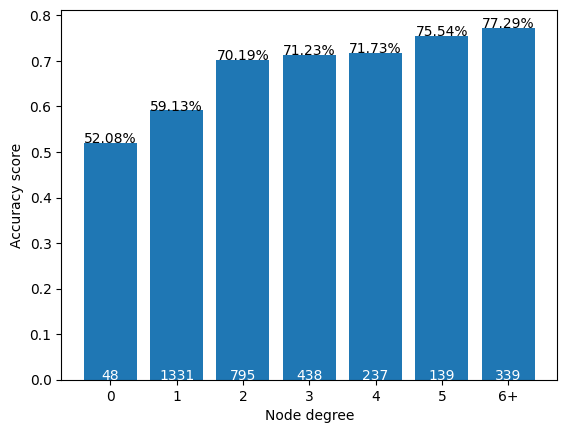

In [8]:
# Get model's classifications
out = gat(data.x, data.edge_index)

# Calculate the degree of each node
degrees = degree(data.edge_index[0]).numpy()

# Store accuracy scores and sample sizes
accuracies = []
sizes = []

# Accuracy for degrees between 0 and 5
for i in range(0, 6):
    mask = np.where(degrees == i)[0]
    accuracies.append(accuracy(out.argmax(dim=1)[mask], data.y[mask]))
    sizes.append(len(mask))

# Accuracy for degrees > 5
mask = np.where(degrees > 5)[0]
accuracies.append(accuracy(out.argmax(dim=1)[mask], data.y[mask]))
sizes.append(len(mask))

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Accuracy score')
plt.bar(['0','1','2','3','4','5','6+'], accuracies)
for i in range(0, 7):
    plt.text(i, accuracies[i], f'{accuracies[i]*100:.2f}%', ha='center', color='black')
for i in range(0, 7):
    plt.text(i, accuracies[i]//2, sizes[i], ha='center', color='white')